# Model `MEBF`

In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

In [2]:
k = 5
overlap = -0.1

[I] m            : 300
[I] n            : 500
[I] k            : 5
[I] overlap      : 2
[I] seed         : 1000
[I] noise        : 2
[I] seed         : 2000
[I] Using RandomState.


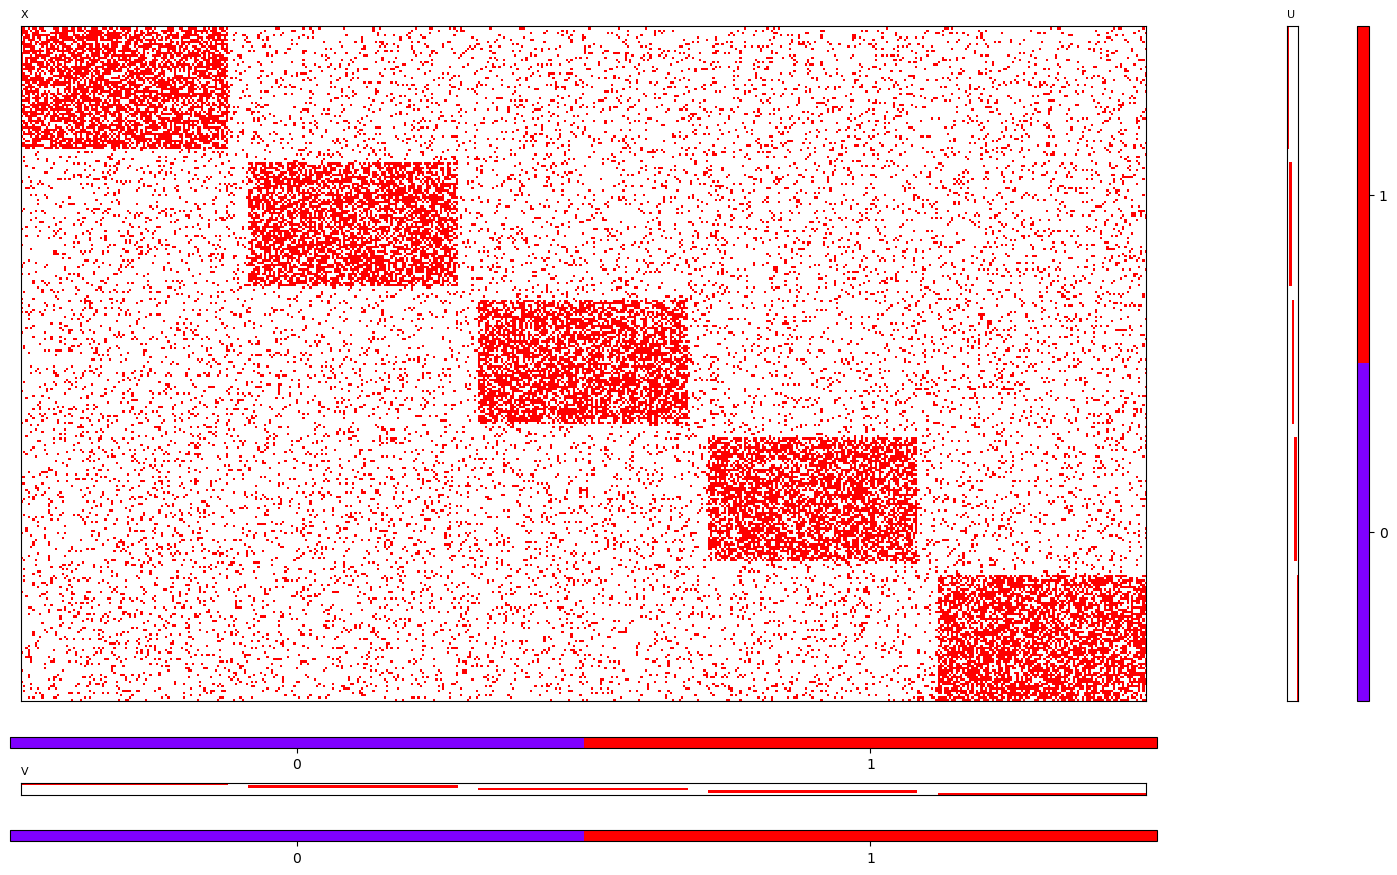

<Figure size 640x480 with 0 Axes>

In [3]:
from generators import BlockDiagonalMatrixGenerator

data = BlockDiagonalMatrixGenerator(m=300, n=500, k=k, overlap=[overlap, overlap])
data.generate(seed=1000)
data.add_noise(noise=[0.4, 0.1], seed=2000)

data.show_matrix()

In [4]:
# from datasets import MovieLensData

# data = MovieLensData(size="100k")
# data.load()

# idx = data.sample(factor_id=0, n_samples=300, seed=1000)
# idx = data.sample(factor_id=1, n_samples=500, seed=1000)

In [5]:
from datasets import RatioSplit, NoSplit

# split = RatioSplit(X=data.X, val_size=0.1, test_size=0.2, seed=1997)
split = NoSplit(X=data.X)
# split.negative_sample(
#     train_size=split.pos_train_size, 
#     val_size=split.pos_val_size, 
#     test_size=split.pos_test_size, 
#     seed=2023, type='popularity')

X_train, X_val, X_test = split.X_train, split.X_val, split.X_test

[I] NoSplit, sampling positives
[I] RatioSplit, sampling positives
[I]   seed         : 1718158699
[I]   train_size   : 28852
[I]   val_size     : 0
[I]   test_size    : 0
[I]   seed         : 1718158699


# AFP

Try to extract as many latent factors as possible.

AFP|e=0, or exact decomposition is not available for this model.

[I] k            : None
[I] tol          : 0.0
[I] t            : 1
[I] w_fp         : 1
[I] w_fn         : 1
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] verbose      : True
[I] Missing validation data.
[W] Missing testing data.
[W] Stopped in advance: No pattern found
[W] Obtained 0 factor(s).


d:\Dropbox\PyBMF\examples\..\utils\display.py:164: RuntimeWarning: All-NaN slice encountered
  emin, emax = np.nanmin(data) < dmin, np.nanmax(data) > dmax


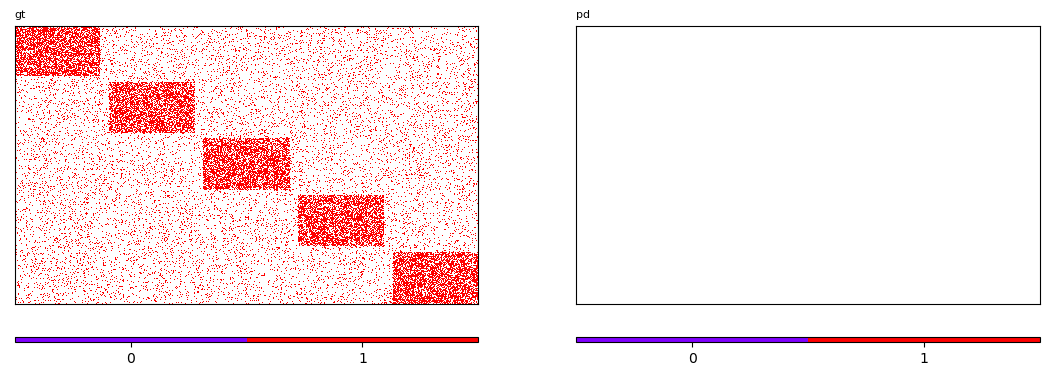

[I] model saved as: 24-06-12_10-19-16_MEBF.pickle


<Figure size 640x480 with 0 Axes>

In [7]:
from models import MEBF

k = None
tol = 0.0
t = 0.5

model = MEBF(k=k, tol=tol, t=t, w_fp=1, w_fn=1)
model.fit(X_train=X_train, task='reconstruction', verbose=True, display=False)

# DBP

[I] k            : 20
[I] tol          : 0.0
[I] t            : 0.5
[I] w_fp         : 1
[I] w_fn         : 1
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] verbose      : True
[I] Missing validation data.
[W] Missing testing data.
[I] k: 0, pattern: [2, 100], d_cost: -116, cost: 28736, e: 28736.0, rs: 28694, err: 0.19157333333333337
[I] k: 1, pattern: [59, 24], d_cost: -164, cost: 28572, e: 28572.0, rs: 27904, err: 0.19047999999999998
[I] k: 2, pattern: [1, 96], d_cost: -96, cost: 28476, e: 28476.0, rs: 27808, err: 0.18984
[I] k: 3, pattern: [58, 26], d_cost: -180, cost: 28296, e: 28296.0, rs: 26964, err: 0.18864000000000003
[I] k: 4, pattern: [10, 93], d_cost: -130, cost: 28166, e: 28166.0, rs: 26436, err: 0.18777333333333335
[I] k: 5, pattern: [10, 93], d_cost: -144, cost: 28022, e: 28022.0, rs: 25899, err: 0.1868133333333334
[I] k: 6, pattern: [1, 92], d_cost: -92, cost: 27930, e: 27930.0, rs: 25807, err: 0.18620000000000003
[I] k: 7, patter

train                      \
                                                      0                       
                 time   cost     shape     rs    Recall Precision  Accuracy   
0   12/06/24 10:21:17  28736  [2, 100]  28694  0.005476  0.790000  0.808427   
1   12/06/24 10:21:17  28572  [59, 24]  27904  0.032857  0.586634  0.809520   
2   12/06/24 10:21:17  28476   [1, 96]  27808  0.036185  0.609813  0.810160   
3   12/06/24 10:21:17  28296  [58, 26]  26964  0.065437  0.586335  0.811360   
4   12/06/24 10:21:17  28166  [10, 93]  26436  0.083738  0.582730  0.812227   
5   12/06/24 10:21:18  28022  [10, 93]  25899  0.102350  0.581757  0.813187   
6   12/06/24 10:21:18  27930   [1, 92]  25807  0.105539  0.589203  0.813800   
7   12/06/24 10:21:18  27792  [11, 92]  25232  0.125468  0.585761  0.814720   
8   12/06/24 10:21:18  27701   [1, 91]  25141  0.128622  0.591772  0.815327   
9   12/06/24 10:21:18  27610   [1, 91]  25050  0.131776  0.597611  0.815933   
10  12/06/24 10:21:18  27519  [53, 11]  24719  0.143248  0.596134  0.816540   
11  12/06/24 10:21:18  27423   [4, 89]  24493  0.151081  0.598024  0.817180   
12  12/06/24 10:21:18  27334   [1, 89]  24404  0.154166  0.602873  0.817773   
13  12/06/24 10:21:18  27245   [1, 89]  24315  0.157251  0.607607  0.818367   
14  12/06/24 10:21:18  27093  [52, 17]  23802  0.175031  0.605443  0.819380   
15  12/06/24 10:21:18  27006   [1, 87]  23715  0.178047  0.609516  0.819960   
16  12/06/24 10:21:19  26909  [50, 13]  23342  0.190975  0.607029  0.820607   
17  12/06/24 10:21:19  26817   [2, 85]  23211  0.195515  0.610036  0.821220   
18  12/06/24 10:21:19  26725   [2, 85]  23080  0.200055  0.612934  0.821833   
19  12/06/24 10:21:19  26640   [1, 85]  22995  0.203002  0.616397  0.822400   

              
              
          F1  
0   0.010877  
1   0.062229  
2   0.068316  
3   0.117735  
4   0.146433  
5   0.174075  
6   0.179012  
7   0.206668  
8   0.211315  
9   0.215937  
10  0.230991  
11  0.241222  
12  0.245542  
13  0.249842  
14  0.271556  
15  0.275590  
16  0.290543  
17  0.296123  
18  0.301654  
19  0.305418

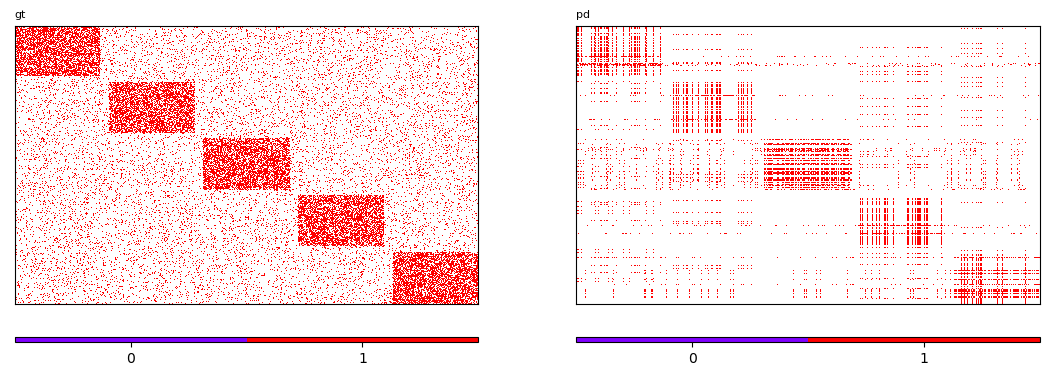

[I] model saved as: 24-06-12_10-21-19_MEBF.pickle


<Figure size 640x480 with 0 Axes>

In [8]:
from models import MEBF

k = 20
tol = 0.0
t = 0.5

model = MEBF(k=k, tol=tol, t=t, w_fp=1, w_fn=1)
model.fit(X_train=X_train, task='reconstruction', verbose=True, display=False)